# K-means implementation in Python using Sklearn/SciKit

### Imports

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets, metrics # Contains IRIS dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output, call
import time, re

# Plotting graph
import matplotlib.pyplot as plt

### Data loading

In [2]:
# IRIS data loading
iris = datasets.load_iris()
iris_data = iris.data[:, :2]
iris_label = iris.target

# BME data loading
bme_file = open("datasets/BME_MOD.txt", "r")
bme_data = []
for line in bme_file:
    bme_data.append(line.split())
    for i in range(0, 129):
        bme_data[-1][i] = float(bme_data[-1][i])


# Confirm all 180 time series (train + test) loaded into array
len(bme_data)

# Convert python array to numpy array
bme_data = np.array(bme_data)

# Scaling data
scaler = MinMaxScaler()
bme_data = scaler.fit_transform(bme_data)

### K-Means

In [10]:
start = time.time()
kmeans_iris = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(iris_data)
kmeans_iris_label = kmeans_iris.fit_predict(iris_data)
end = time.time()
print("Time taken for IRIS dataset: ", end - start)
start = time.time()
kmeans_bme = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(bme_data)
kmeans_bme_label = kmeans_bme.fit_predict(bme_data)
end = time.time()
print("Time taken for BME dataset: ", end - start)

Time taken for IRIS dataset:  0.009634971618652344
Time taken for BME dataset:  0.011644840240478516


### Plotting

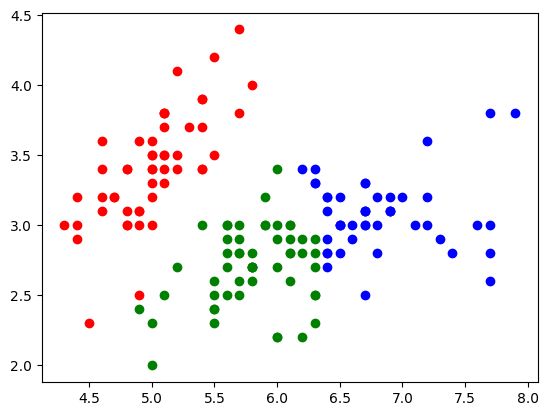

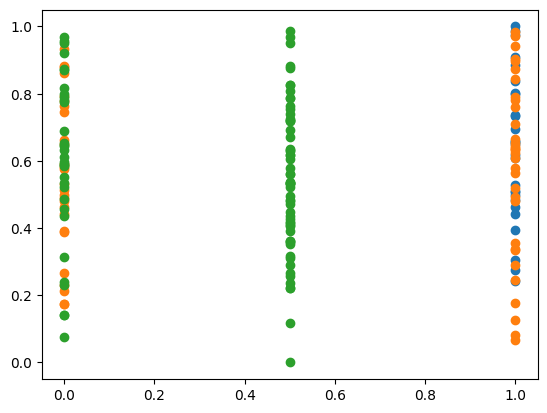

In [4]:
#filter rows of original data
filtered_label0 = iris_data[kmeans_iris_label == 0]
filtered_label1 = iris_data[kmeans_iris_label == 1]
filtered_label2 = iris_data[kmeans_iris_label == 2]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.show()

#filter rows of original data
filtered_label0 = bme_data[kmeans_bme_label == 0]
filtered_label1 = bme_data[kmeans_bme_label == 1]
filtered_label2 = bme_data[kmeans_bme_label == 2]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1])
plt.show()

### Get the results from the C implementation of k-means

In [5]:
# use subprocess to compile as 'gcc k-means'
call(['gcc', 'k-means.c'])
# use subprocess.check_output of command './a.out bme 5'
output = check_output(['./a.out', 'bme', '5']).decode('utf-8')
print(output)
# use regex to extract the time taken
time_taken = re.findall(r'Time elapsed: (.*)', output)[0]
print(time_taken)
# use regex to find all mappings
mappings = re.findall(r'S:(.*) -> C:(.*)', output)
print(mappings)




Converged after 8 iterations

Final mapping:
S:1   -> C:4	S:2   -> C:1	S:3   -> C:1	S:4   -> C:3	
S:5   -> C:4	S:6   -> C:4	S:7   -> C:1	S:8   -> C:2	
S:9   -> C:1	S:10  -> C:4	S:11  -> C:1	S:12  -> C:4	
S:13  -> C:4	S:14  -> C:4	S:15  -> C:4	S:16  -> C:1	
S:17  -> C:4	S:18  -> C:1	S:19  -> C:1	S:20  -> C:2	
S:21  -> C:3	S:22  -> C:4	S:23  -> C:3	S:24  -> C:3	
S:25  -> C:1	S:26  -> C:4	S:27  -> C:1	S:28  -> C:3	
S:29  -> C:1	S:30  -> C:4	S:31  -> C:1	S:32  -> C:3	
S:33  -> C:1	S:34  -> C:3	S:35  -> C:1	S:36  -> C:4	
S:37  -> C:2	S:38  -> C:1	S:39  -> C:4	S:40  -> C:3	
S:41  -> C:4	S:42  -> C:4	S:43  -> C:1	S:44  -> C:3	
S:45  -> C:4	S:46  -> C:1	S:47  -> C:4	S:48  -> C:4	
S:49  -> C:4	S:50  -> C:3	S:51  -> C:1	S:52  -> C:2	
S:53  -> C:3	S:54  -> C:2	S:55  -> C:1	S:56  -> C:5	
S:57  -> C:3	S:58  -> C:1	S:59  -> C:1	S:60  -> C:2	
S:61  -> C:2	S:62  -> C:5	S:63  -> C:2	S:64  -> C:2	
S:65  -> C:5	S:66  -> C:5	S:67  -> C:2	S:68  -> C:2	
S:69  -> C:3	S:70  -> C:1	S:71  -> C:5	S:72  -> C:3	
S

### RAND Score

In [6]:
# Manual labeling of BME data
bme_label = np.full((60), 0)
bme_label = np.append(bme_label, np.full((60), 1))
bme_label = np.append(bme_label, np.full((60), 2))

kmeans_iris_pred = np.array([1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,2,2,1,2,2,2,2,1,2,1,1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,2,2,1,2,1,2,1,3,3,3,3,3,3,3,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])
kmeans_bme_pred = np.array([3,2,2,1,3,3,2,1,1,3,1,3,3,3,3,2,3,2,2,1,1,3,1,1,2,3,2,1,1,3,2,1,2,1,2,3,1,2,3,1,3,3,2,1,3,2,3,3,3,1,2,1,1,1,2,2,1,2,2,1,1,1,1,1,2,2,1,1,1,2,2,1,2,2,2,1,1,2,1,2,1,1,2,2,2,2,1,2,2,1,2,2,1,1,1,1,2,2,1,2,3,1,3,3,1,1,2,1,2,3,1,1,3,1,3,1,1,3,2,3,3,2,1,1,3,2,1,3,3,3,1,3,3,1,1,1,3,3,2,3,3,3,3,3,1,1,3,3,3,3,3,3,3,1,3,3,3,3,2,1,1,2,2,2,1,1,1,2,2,1,3,3,2,3,2,1,3,3,3,3])

print("RAND Scores:\n IRIS - Sklearn, K-Means:", metrics.rand_score(iris_label, kmeans_iris_label))
print("BME - Sklearn, K-Means:", metrics.rand_score(bme_label, kmeans_bme_label))
print("IRIS - C, K-Means:", metrics.rand_score(iris_label, kmeans_iris_pred))
print("BME - C, K-Means:", metrics.rand_score(bme_label, kmeans_bme_label))

RAND Scores:
 IRIS - Sklearn, K-Means: 0.8171812080536913
BME - Sklearn, K-Means: 0.711173184357542
IRIS - C, K-Means: 0.7214317673378076
BME - C, K-Means: 0.711173184357542
